# CS 4464/7643 Deep Learning HW 1

### Setup - Google Colab

Edit and run the cell below to setup the environment for Google Colab (and only for Google Colab).

In [1]:
#Cell 1
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Cell 2
%cd /content/drive/MyDrive/[0][b] GaTech Academic/[3] CS 4644 Deep Learning/[1] Homework/[1] Assignment 1/HW1/HW1Code-Spring2023/student_version/data
!sh get_data.sh
%cd ..

/content/drive/MyDrive/[0][b] GaTech Academic/[3] CS 4644 Deep Learning/[1] Homework/[1] Assignment 1/HW1/HW1Code-Spring2023/student_version/data
--2023-02-03 01:07:02--  https://pjreddie.com/media/files/mnist_train.csv
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109575994 (104M) [application/octet-stream]
Saving to: ‘mnist_train.csv.32’

mnist_train.csv.32  100%[===================>] 104.50M  31.9MB/s    in 3.4s    

2023-02-03 01:07:06 (30.4 MB/s) - ‘mnist_train.csv.32’ saved [109575994/109575994]

--2023-02-03 01:07:06--  https://pjreddie.com/media/files/mnist_test.csv
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18289443 (17M) [application/octet-stream]
Saving to: ‘mnist_test.csv.32’

mnist_test.csv.32   1

### Setup - Local Environment (Mac)

Run the cell below **once** if using the suggested local environment (and only the local environment - Mac).

Then, change the ipykernel in the top right of this VS Code window to `dl_hw1`.

In [ ]:
#Cell 1
%conda env create -f ./local_environment/environment.yaml

In [ ]:
#Cell 2
%cd 'PATH TO HW1 UNZIPPED FILES'/hw1/student_version/data
!sh get_data.sh
%cd ..

### Setup - Local Environment (Windows)

Run the cell below **once** if using the suggested local environment (and only the local environment - Windows).

Then, change the ipykernel in the top right of this VS Code window to `dl_hw1`.

In [ ]:
#Cell 1
%conda env create -f ./local_environment/environment.yaml

In [ ]:
#Cell 2
%cd User\'PATH TO HW1 UNZIPPED FILES'\hw1\student_version\data
! get_data.bat
%cd ..

### All the following are for both Google Colab and the suggested local environment. 

In [ ]:
# Cell 3
# Run all local tests in this block
# If you get an error saying test not found, add an __init__.py file in the
# tests directory
#!python -m unittest tests.test_network
#!python -m unittest tests.test_loading
#!python -m unittest tests.test_activation
#!python -m unittest tests.test_loss
#!python -m unittest tests.test_network
#!python -m unittest tests.test_training


In [3]:
#Cell 4
import yaml
import copy

from models import TwoLayerNet, SoftmaxRegression
from optimizer import SGD
from utils import load_mnist_trainval, load_mnist_test, generate_batched_data, train, evaluate, plot_curves

In [4]:
# Cell 5
%matplotlib inline
def train_model(yaml_config_file):
  args = {}
  with open(yaml_config_file) as f:
      config = yaml.full_load(f)

  for key in config:
      for k, v in config[key].items():
          args[k] = v
  
  # Prepare MNIST data
  train_data, train_label, val_data, val_label = load_mnist_trainval()
  test_data, test_label = load_mnist_test()

  # Prepare model and optimizer
  if args["type"] == 'SoftmaxRegression':
      model = SoftmaxRegression()
  elif args["type"] == 'TwoLayerNet':
      model = TwoLayerNet(hidden_size=args["hidden_size"])
  optimizer = SGD(learning_rate=args["learning_rate"], reg=args["reg"])
  
  # Training Code
  train_loss_history = []
  train_acc_history = []
  valid_loss_history = []
  valid_acc_history = []
  best_acc = 0.0
  best_model = None
  for epoch in range(args["epochs"]):
      batched_train_data, batched_train_label = generate_batched_data(train_data, train_label, batch_size=args["batch_size"], shuffle=True)
      epoch_loss, epoch_acc = train(epoch, batched_train_data, batched_train_label, model, optimizer, args["debug"])

      train_loss_history.append(epoch_loss)
      train_acc_history.append(epoch_acc)
      # evaluate on test data
      batched_test_data, batched_test_label = generate_batched_data(val_data, val_label, batch_size=args["batch_size"])
      valid_loss, valid_acc = evaluate(batched_test_data, batched_test_label, model, args["debug"])
      if args["debug"]:
          print("* Validation Accuracy: {accuracy:.4f}".format(accuracy=valid_acc))

      valid_loss_history.append(valid_loss)
      valid_acc_history.append(valid_acc)

      if valid_acc > best_acc:
          best_acc = valid_acc
          best_model = copy.deepcopy(model)
  
  #Testing Code
  batched_test_data, batched_test_label = generate_batched_data(test_data, test_label, batch_size=args["batch_size"])
  _, test_acc = evaluate(batched_test_data, batched_test_label, best_model) # test the best model
  if args["debug"]:
      print("Final Accuracy on Test Data: {accuracy:.4f}".format(accuracy=test_acc))
  
  return train_loss_history, train_acc_history, valid_loss_history, valid_acc_history

In [ ]:
# Cell 6
# train softmax model
train_loss_history, train_acc_history, valid_loss_history, valid_acc_history = train_model("configs/config_softmax.yaml")

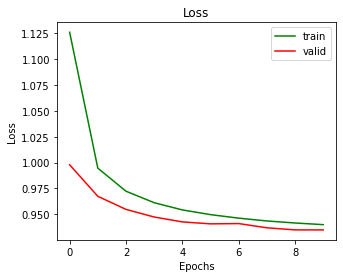

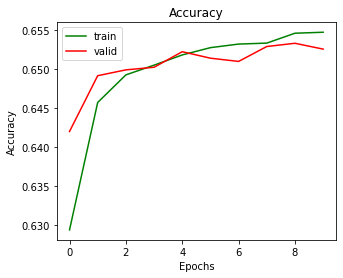

In [ ]:
# Cell 7
# plot results for softmax model
plot_curves(train_loss_history, train_acc_history, valid_loss_history, valid_acc_history)

In [ ]:
# Cell 8
# train two layer neural network
train_loss_history, train_acc_history, valid_loss_history, valid_acc_history = train_model("configs/config_twolayer.yaml")

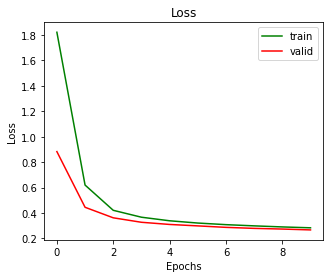

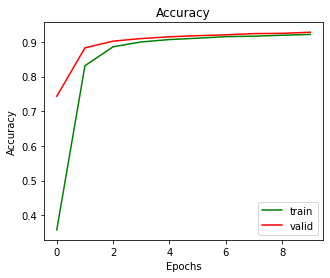

In [ ]:
# Cell 9
# plot two layer neural network
plot_curves(train_loss_history, train_acc_history, valid_loss_history, valid_acc_history)

# **Assignment 1 Writeup**

- Name: Susanna Paoli
- GT Email: spaoli3@gatech.edu
- GT ID: 903866307



## Two Layer Neural Network

# Learning Rates

- Tune the Two Layer Neural Network with various learning rates (while keeping all other hyperparameters constant) by changing the config file.
  - lr = 1
  - lr = 1e-1
  - lr = 1e-2
  - lr = 5e-2


In [ ]:
# Cell 10
# Change lr to 1 in the config file and run this code block
train_loss_history, train_acc_history, valid_loss_history, valid_acc_history = train_model("configs/config_exp.yaml")

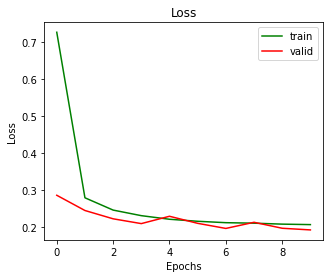

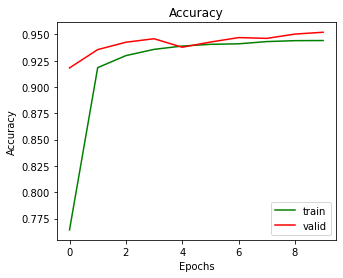

In [ ]:
# Cell 11
plot_curves(train_loss_history, train_acc_history, valid_loss_history, valid_acc_history)

In [ ]:
# Cell 12
# Change lr to 1e-1 in the config file and run this code block
train_loss_history, train_acc_history, valid_loss_history, valid_acc_history = train_model("configs/config_exp.yaml")

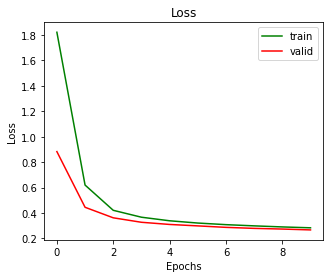

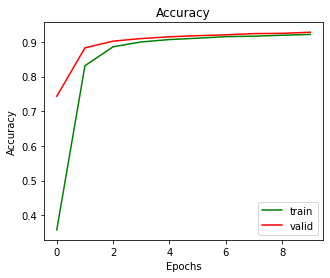

In [ ]:
# Cell 13
plot_curves(train_loss_history, train_acc_history, valid_loss_history, valid_acc_history)

In [ ]:
# Cell 14
# Change lr to 1e-2 in the config file and run this code block
train_loss_history, train_acc_history, valid_loss_history, valid_acc_history = train_model("configs/config_exp.yaml")

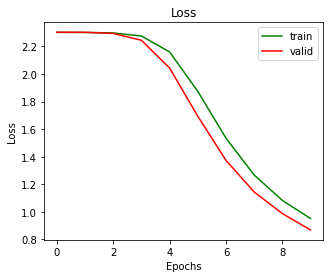

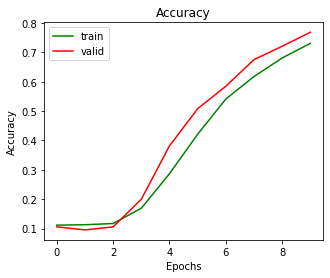

In [ ]:
# Cell 15
plot_curves(train_loss_history, train_acc_history, valid_loss_history, valid_acc_history)

In [ ]:
# Cell 16
# Change lr to 5e-2 in the config file and run this code block
train_loss_history, train_acc_history, valid_loss_history, valid_acc_history = train_model("configs/config_exp.yaml")

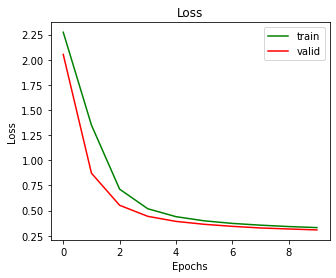

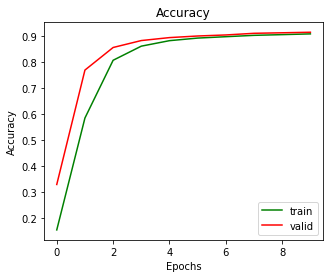

In [ ]:
# Cell 17
plot_curves(train_loss_history, train_acc_history, valid_loss_history, valid_acc_history)

Describe and explain your findings here: After testing all different learning rate values, the model with the highest accuracy is the one with the learning rate equal to 1, even if it is unusual in a machine learning model using gradient descent to have the highest accuracy when the learning rate is 1. When the learning rate is too high the risk with gradient descent is that it keeps jumping over the minimum without ever reaching it. In this case, though, we also have regularization that affects the algorithm's results. I also think it's important to note that we reach a high accuracy even when considering a learning rate equal to 1 due to the randomness of the data batches and starting point of the gradient descent. Additionally, we might also consider this is possible because we are dealing with a relatively simple problem (MNIST). 

# Regularization

- Tune the Two Layer Neural Network with various regularization coefficients (while keeping all other hyperparameters constant) by changing the config file.
  
  - reg = 1e-1
  - reg = 1e-2
  - reg = 1e-3
  - reg = 1e-4
  - reg = 1


In [ ]:
# Cell 18
# Change reg to 1e-1 in the config file and run this code block
train_loss_history, train_acc_history, valid_loss_history, valid_acc_history = train_model("configs/config_exp.yaml")

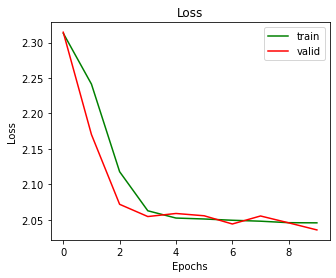

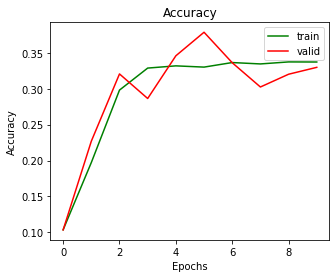

In [ ]:
# Cell 19
plot_curves(train_loss_history, train_acc_history, valid_loss_history, valid_acc_history)

In [ ]:
# Cell 20
# Change reg to 1e-2 in the config file and run this code block
train_loss_history, train_acc_history, valid_loss_history, valid_acc_history = train_model("configs/config_exp.yaml")

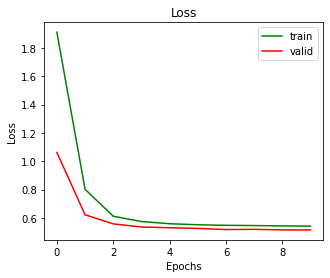

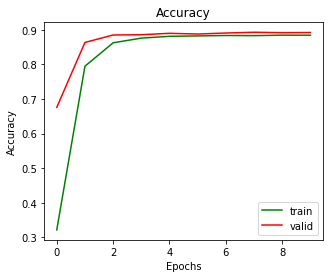

In [ ]:
# Cell 21
plot_curves(train_loss_history, train_acc_history, valid_loss_history, valid_acc_history)

In [ ]:
# Cell 22
# Change reg to 1e-3 in the config file and run this code block
train_loss_history, train_acc_history, valid_loss_history, valid_acc_history = train_model("configs/config_exp.yaml")

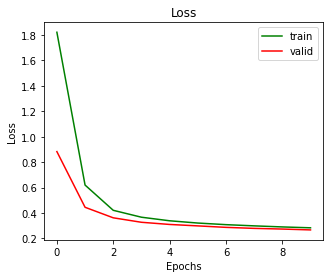

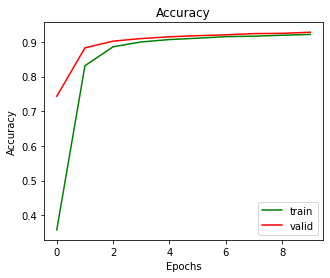

In [ ]:
# Cell 23
plot_curves(train_loss_history, train_acc_history, valid_loss_history, valid_acc_history)

In [ ]:
# Cell 24
# Change reg to 1e-4 in the config file and run this code block
train_loss_history, train_acc_history, valid_loss_history, valid_acc_history = train_model("configs/config_exp.yaml")

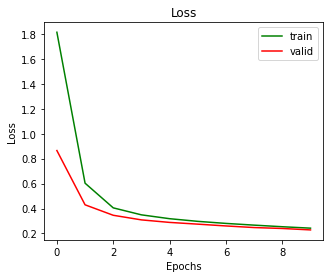

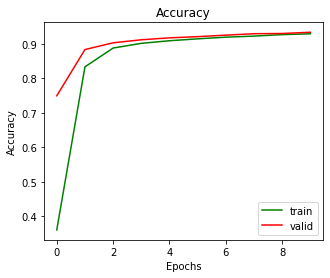

In [ ]:
# Cell 25
plot_curves(train_loss_history, train_acc_history, valid_loss_history, valid_acc_history)

In [ ]:
# Cell 26
# Change reg to 1 in the config file and run this code block
train_loss_history, train_acc_history, valid_loss_history, valid_acc_history = train_model("configs/config_exp.yaml")

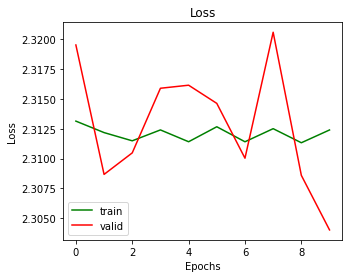

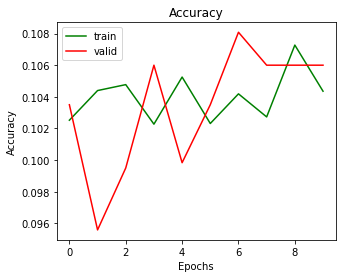

In [ ]:
# Cell 27
plot_curves(train_loss_history, train_acc_history, valid_loss_history, valid_acc_history)

Describe and explain your findings here: In this situation the highest accuracy is reached with lambda 1e-4. In this deep-learning scenario, we use regularization to avoid overfitting. However, we need to apply a regularization parameter that is not too high, otherwise, we risk obtaining the opposite results. I think it is worth noting that when we apply a regularization coefficient equal to 1 (extremely high), we get an extremely low accuracy in fact due to the inability of the model to learn with such a high penalization. 

## Hyper-parameter Tuning

You are now free to tune any hyperparameters for better accuracy. In this block type the configuration of your best model and provide a brief explanation of why it works.

In [ ]:
# Cell 28
# hyperparameter tuning
train_loss_history, train_acc_history, valid_loss_history, valid_acc_history = train_model("configs/config_exp.yaml")

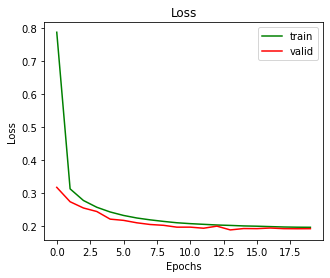

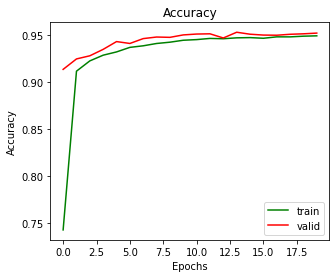

In [11]:
# Cell 29
plot_curves(train_loss_history, train_acc_history, valid_loss_history, valid_acc_history)

For the general hyper-parameter tuning part, I chose as my final configuration the learning rate equal to 0.5, the regularization coefficient equal to 0.001, and I increased the number of epochs to 20. Coming from the first two sections of the experiments, I realized the model needs a regularization coefficient that is not too high. In this case, by setting it equal to 0.001 I can obtain high accuracy on my testing data and deal with the overfitting problem. On the other hand, given the size of the regularization coefficient, we cannot keep a too-small learning rate, otherwise, we risk obtaining the opposite result and never reaching the minimum. Finally, to balance the learning rate, regularization coefficient, accuracy, and overfitting problem, I increased the epochs to 20. I also tried pushing them over, but the accuracy of the test data was lower. I think this is due to the fact that if the epochs are too high, despite regularization, the model starts overfitting. I get a final accuracy on test data of 0.9511. 

In [ ]:
# Cell 30
#To collect submission
!sh collect_submission.sh

# For Windows
# ! collect_submission.bat